In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('amazon_laptops_data.csv')

In [71]:
df.head()

,Model,Rating,LastMonth,MRP,Discount
0,0,4.0,400+,62417,50240
1,0,5.0,0,65990,37190
2,Lenovo IdeaPad,3.9,300+,70790,49990
3,Lenovo V14,5.0,0,65000,44988
4,Acer ALG,4.0,0,74999,63999


In [72]:
df.shape

(367, 5)

In [73]:
df.columns

Index(['Model', 'Rating', 'LastMonth', 'MRP', 'Discount'], dtype='object')

In [74]:
df.replace("0", np.nan, inplace=True)
df.head()

,Model,Rating,LastMonth,MRP,Discount
0,NaN,4.0,400+,62417,50240
1,NaN,5.0,NaN,65990,37190
2,Lenovo IdeaPad,3.9,300+,70790,49990
3,Lenovo V14,5.0,NaN,65000,44988
4,Acer ALG,4.0,NaN,74999,63999


In [75]:
m = (df['Model'].isna()).sum()
mrp = (df['MRP'].isna()).sum()
dis = (df['Discount'].isna()).sum()
lm = (df['LastMonth'].isna()).sum()
print(m, mrp, dis, lm)


93 0 0 180


In [76]:
df = df[~(df['Model'].isna() & ((df['LastMonth'].isna()) | (df['LastMonth'] == 0)))]


In [77]:
count = df.loc[df['Model'].isna() & df['LastMonth'].notna()].shape[0]
print(count)

52


In [78]:
df.head()

,Model,Rating,LastMonth,MRP,Discount
0,NaN,4.0,400+,62417,50240
2,Lenovo IdeaPad,3.9,300+,70790,49990
3,Lenovo V14,5.0,NaN,65000,44988
4,Acer ALG,4.0,NaN,74999,63999
5,ACER One,5.0,NaN,39999,22990


In [79]:
df.shape

(326, 5)

In [80]:
df['LastMonth'] = df['LastMonth'].str.replace('+','')
df.head()

,Model,Rating,LastMonth,MRP,Discount
0,NaN,4.0,400,62417,50240
2,Lenovo IdeaPad,3.9,300,70790,49990
3,Lenovo V14,5.0,NaN,65000,44988
4,Acer ALG,4.0,NaN,74999,63999
5,ACER One,5.0,NaN,39999,22990


In [81]:
print(df['LastMonth'], df['Model'])


0      400
2      300
3      NaN
4      NaN
5      NaN
      ... 
362    NaN
363    NaN
364    NaN
365    NaN
366     50
Name: LastMonth, Length: 326, dtype: object 0                 NaN
2      Lenovo IdeaPad
3          Lenovo V14
4            Acer ALG
5            ACER One
            ...      
362       Acer Aspire
363        Lenovo V14
364             HP 15
365     Dell Inspiron
366       HP Pavilion
Name: Model, Length: 326, dtype: object


In [82]:
df['LastMonth'].isna().sum()


139

In [83]:
df.head()

,Model,Rating,LastMonth,MRP,Discount
0,NaN,4.0,400,62417,50240
2,Lenovo IdeaPad,3.9,300,70790,49990
3,Lenovo V14,5.0,NaN,65000,44988
4,Acer ALG,4.0,NaN,74999,63999
5,ACER One,5.0,NaN,39999,22990


In [84]:
df['LastMonth'] = df['LastMonth'].astype(str).str.replace('+', '', regex=False)
df['LastMonth'] = pd.to_numeric(df['LastMonth'], errors='coerce')
min_value = df.loc[df['LastMonth'] > 0, 'LastMonth'].min()
print("Lowest non-zero LastMonth value:", min_value)

Lowest non-zero LastMonth value: 50.0


In [85]:
print(df['MRP'].dtype)
print(df['Discount'].dtype)


int64
int64


In [86]:
df['LastMonth'] = df['LastMonth'].replace(0, np.NaN).fillna(min_value)

In [87]:
df['Model'] = df['Model'].fillna('Unknown')


In [88]:
#CLEANED DATA 
df.head()

,Model,Rating,LastMonth,MRP,Discount
0,Unknown,4.0,400.0,62417,50240
2,Lenovo IdeaPad,3.9,300.0,70790,49990
3,Lenovo V14,5.0,50.0,65000,44988
4,Acer ALG,4.0,50.0,74999,63999
5,ACER One,5.0,50.0,39999,22990


In [89]:
#New Columns

df['Discount%'] = (((df['MRP'] - df['Discount']) / df['MRP']) * 100).round(2)

df['Revenue'] = df['LastMonth']*df['Discount']

#remove rows 
((df['MRP'] == 0) | (df['Discount'] == 0)).sum()

df = df[(df['MRP'] != 0) & (df['Discount'] != 0)]


In [90]:
df.head()

,Model,Rating,LastMonth,MRP,Discount,Discount%,Revenue
0,Unknown,4.0,400.0,62417,50240,19.51,20096000.0
2,Lenovo IdeaPad,3.9,300.0,70790,49990,29.38,14997000.0
3,Lenovo V14,5.0,50.0,65000,44988,30.79,2249400.0
4,Acer ALG,4.0,50.0,74999,63999,14.67,3199950.0
5,ACER One,5.0,50.0,39999,22990,42.52,1149500.0


In [91]:
def price_segment(price):
    if price < 30000:
        return 'Budget'
    elif price < 60000:
        return 'Mid-Range'
    else:
        return 'Premium'

df['PriceSegment'] = df['Discount'].astype(float).apply(price_segment)

df['Brand'] = df['Model'].str.split().str[0].str.lower()



In [92]:
df.head()

,Model,Rating,LastMonth,MRP,Discount,Discount%,Revenue,PriceSegment,Brand
0,Unknown,4.0,400.0,62417,50240,19.51,20096000.0,Mid-Range,unknown
2,Lenovo IdeaPad,3.9,300.0,70790,49990,29.38,14997000.0,Mid-Range,lenovo
3,Lenovo V14,5.0,50.0,65000,44988,30.79,2249400.0,Mid-Range,lenovo
4,Acer ALG,4.0,50.0,74999,63999,14.67,3199950.0,Premium,acer
5,ACER One,5.0,50.0,39999,22990,42.52,1149500.0,Budget,acer


C:\Users\HP\AppData\Local\Temp\ipykernel_9980\2654623736.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_revenue.index, y=brand_revenue.values, palette='viridis')


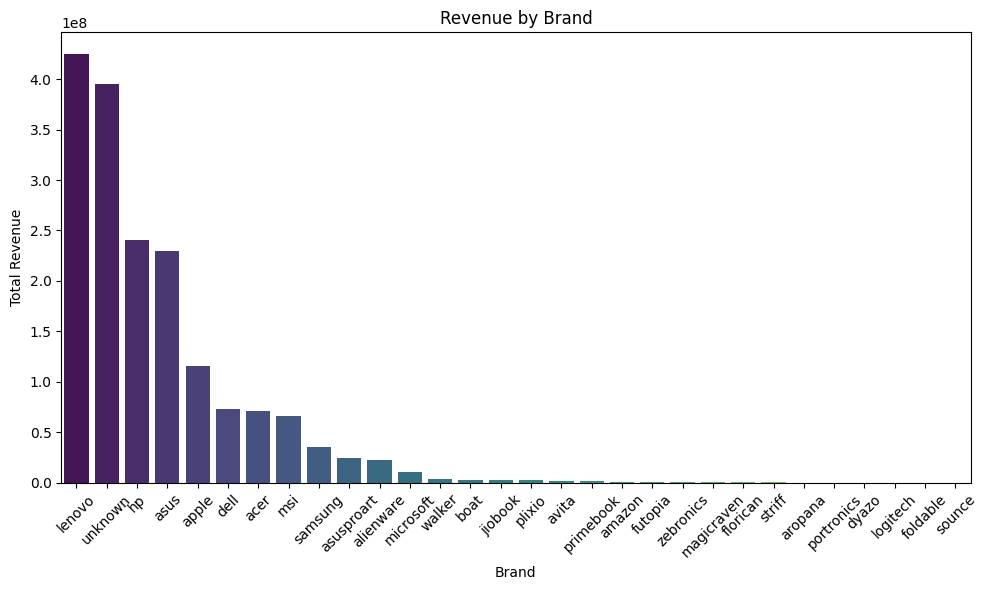

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

brand_revenue = df.groupby('Brand')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=brand_revenue.index, y=brand_revenue.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
plt.title('Revenue by Brand')
plt.tight_layout()
plt.show()


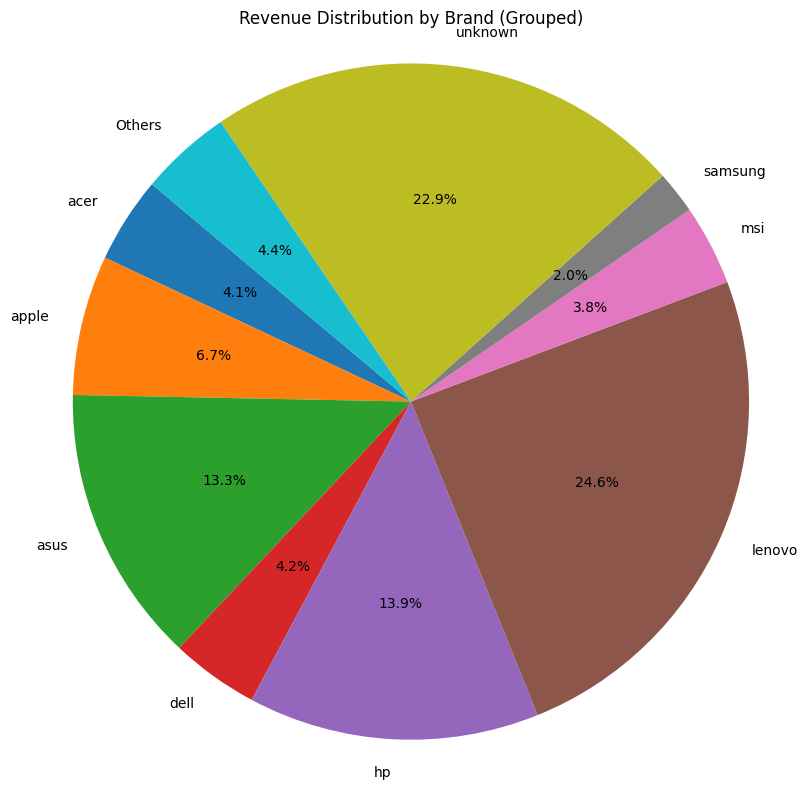

In [94]:

brand_revenue = df.groupby('Brand')['Revenue'].sum()


total_revenue = brand_revenue.sum()
percent_share = brand_revenue / total_revenue

major_brands = brand_revenue[percent_share >= 0.02]
minor_brands = brand_revenue[percent_share < 0.02]

# Add "Others" category
grouped_revenue = major_brands.copy()
grouped_revenue['Others'] = minor_brands.sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_revenue.values, labels=grouped_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Brand (Grouped)')
plt.axis('equal')
plt.tight_layout()
plt.show()


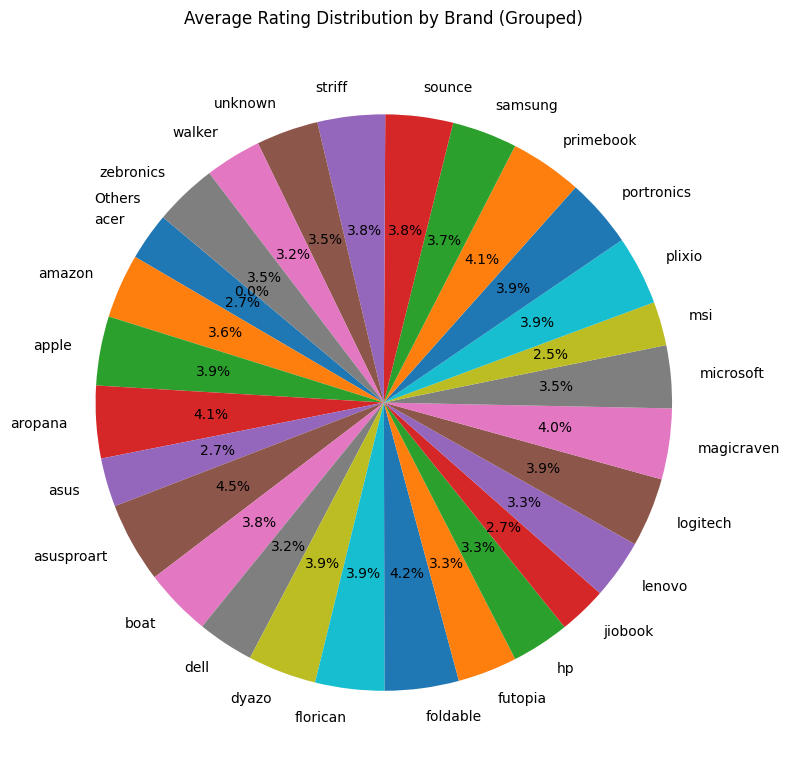

In [95]:
avg_rating = df.groupby('Brand')['Rating'].mean()

rating_sum = avg_rating.sum()
percent_share = avg_rating / rating_sum

major_brands = avg_rating[percent_share >= 0.02]
minor_brands = avg_rating[percent_share < 0.02]

grouped_rating = major_brands.copy()
grouped_rating['Others'] = minor_brands.sum()



plt.figure(figsize=(8, 8))
plt.pie(grouped_rating.values, labels=grouped_rating.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Rating Distribution by Brand (Grouped)')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [96]:
df.head()

,Model,Rating,LastMonth,MRP,Discount,Discount%,Revenue,PriceSegment,Brand
0,Unknown,4.0,400.0,62417,50240,19.51,20096000.0,Mid-Range,unknown
2,Lenovo IdeaPad,3.9,300.0,70790,49990,29.38,14997000.0,Mid-Range,lenovo
3,Lenovo V14,5.0,50.0,65000,44988,30.79,2249400.0,Mid-Range,lenovo
4,Acer ALG,4.0,50.0,74999,63999,14.67,3199950.0,Premium,acer
5,ACER One,5.0,50.0,39999,22990,42.52,1149500.0,Budget,acer


In [97]:
import sqlite3

# Connect to SQLite database (it will create the file if it doesn't exist)
conn = sqlite3.connect("amazon_laptops.db")

# Save DataFrame to a table named 'laptops'
df.to_sql("laptops", conn, if_exists="replace", index=False)

# Close the connection
conn.close()

In [98]:
import sqlite3
import pandas as pd

# Connect to SQLite
conn = sqlite3.connect('amazon_laptops.db')

# Read the laptops table
df = pd.read_sql_query("SELECT * FROM laptops", conn)

# Export to CSV
df.to_csv("laptops.csv", index=False)


In [99]:

df.shape

(309, 9)

In [100]:
((df['MRP'] == 0) | (df['Discount'] == 0)).sum()

0